In [9]:
#Libraries

import math
import cmath
import numpy as np
import scipy.io as sio
from scipy.fft import fft, fftfreq
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time
from scipy.integrate import quad
from scipy.signal import find_peaks

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [10]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n >= 0:
        return 1
    else:
        return 0
    
def ret(t):
    if abs(t) > (1/2):
        return 0
    elif abs(t) == (1/2):
        return (1/2)
    elif abs(t) < (1/2):
        return 1

def convolucao(h, x):
    y = []
    for i in range(len(h) + len(x)):
        elemento = 0
        for j in range(len(h) + len(x)):
            if i - j >= 0:
                if (j > (len(h)-1)) and ((i - j) > (len(x)-1)):
                    elemento += 0 * 0
                elif j > (len(h)-1):
                    elemento += 0 * x[i - j]
                elif (i - j) > (len(x)-1):
                    elemento += h[j] * 0
                else:
                    elemento += h[j] * x[i - j]
        y.append(elemento) 
    return y

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

Grafico de x(t)


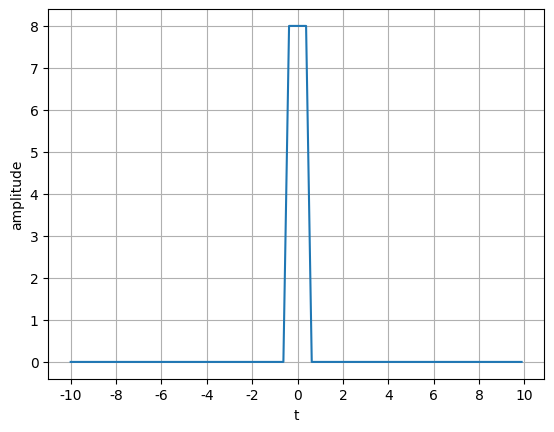

In [11]:
def x(t):
    return 8*ret(t)
x_amostrado = []

for t in np.arange(-10, 10, 1/8):
    x_amostrado.append(x(t))

print("Grafico de x(t)")
plt.plot(x_amostrado)
plt.xticks([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160], ["-10", "-8", "-6", "-4", "-2", "0", "2", "4", "6", "8", "10"])
plt.xlabel("t")
plt.ylabel("amplitude")
plt.grid()
plt.show()

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

Grafico de x(t)


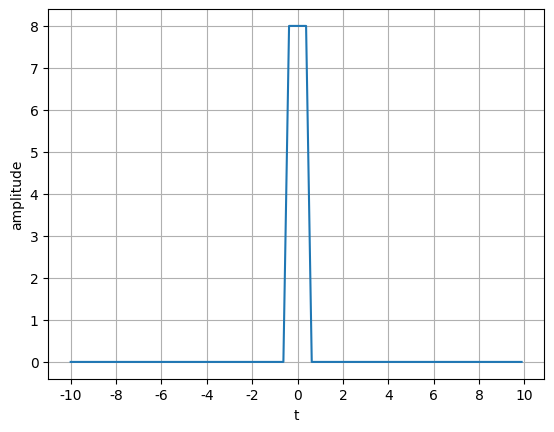

Grafico da transformada real)


C:\Users\Usuário\AppData\Local\Temp\ipykernel_5924\1843605413.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return 8*(np.sin(w)/w)


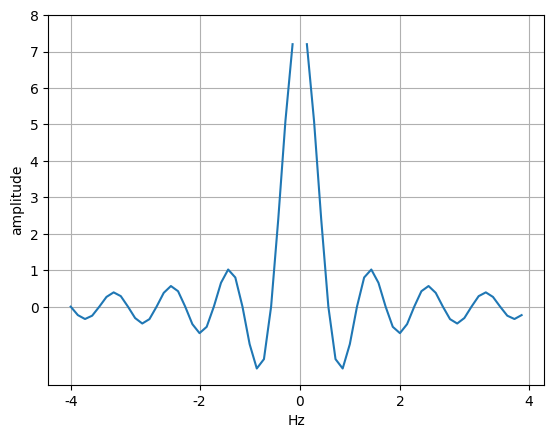

Graficode x[n]


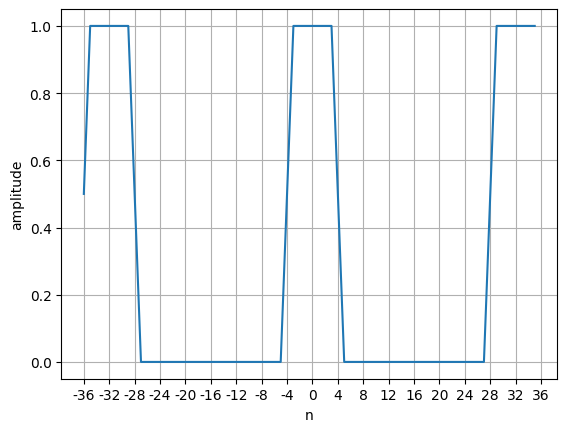

Graficode da transformada discreta


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


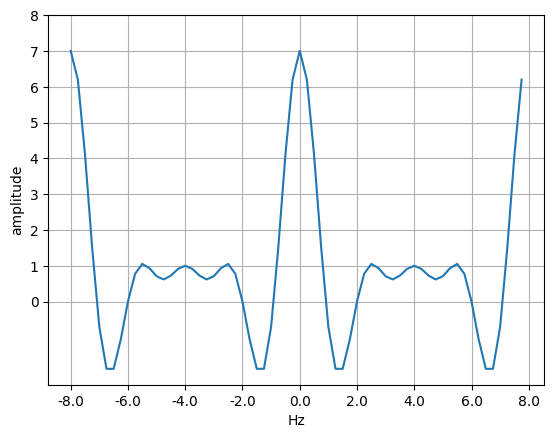

In [12]:
print("Grafico de x(t)")
plt.plot(x_amostrado)
plt.xticks([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160], ["-10", "-8", "-6", "-4", "-2", "0", "2", "4", "6", "8", "10"])
plt.xlabel("t")
plt.ylabel("amplitude")
plt.grid()
plt.show()

def x_transformado(w):
    return 8*(np.sin(w)/w)

x_trans_amostrado = []

for i in np.arange(-4, 4, 1/8):
    w = i*2*np.pi
    x_trans_amostrado.append(x_transformado(w))

print("Grafico da transformada real)")
plt.plot(x_trans_amostrado)
plt.xticks([0, 18, 32, 46, 64], ["-4", "-2", "0", "2", "4"])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ["0", "1", "2", "3", "4", "5", "6", "7", "8",])
plt.xlabel("Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

T = 1/8
f0 = 1/4
T0 = 1/f0
N0 = T0/T

def xTDR(i):
    if abs(i) > 16:
        if i > 0:
            n = i - 32
        if i < 0:
            n = i + 32
    elif abs(i) > 32:
        if i > 0:
            n = i - 48
        if i < 0:
            n = i + 48
    else:
        n = i
    return T*x(n*T)

xn = []

for t in np.arange(-36, 36):
    xn.append(xTDR(t))

print("Graficode x[n]")
plt.plot(xn)
plt.xticks(range(0, 73, 4), (str(i-36) for i in range(0, 73, 4)))
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

def xr(w):
    resposta = 0
    for i in range(0, 31):
        resposta += xTDR(i)*np.exp(-1j*w*(np.pi/16)*(i))
    return resposta

holder2 = []

for t in np.arange(-32, 32):
    holder2.append(xr(t))

print("Graficode da transformada discreta")
plt.plot(holder2)
plt.xticks(range(0, 65, 8), (str((i-32)/4) for i in range(0, 65, 8)))
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ["0", "1", "2", "3", "4", "5", "6", "7", "8",])
plt.xlabel("Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

Graficode de x[n]


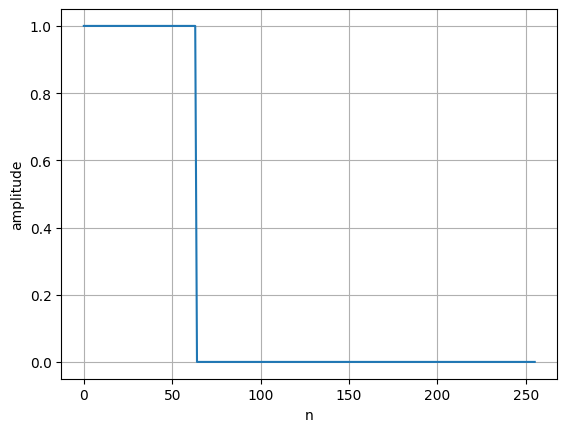

Graficode de x[n] filtrado


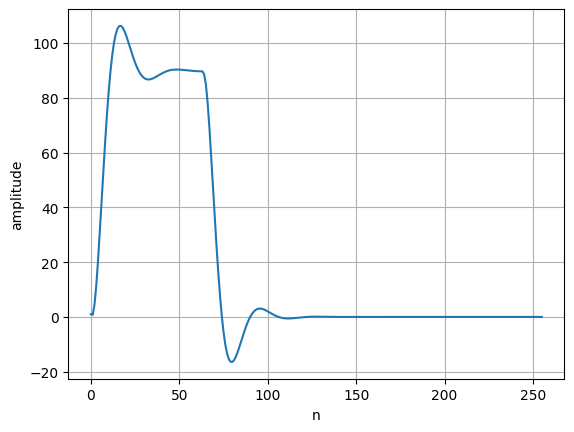

In [13]:
def filtro(x):
    Fcorte = 1/16
    k = 1
    a = 0.9
    cos = 2*math.cos((Fcorte)*math.pi)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (2*k*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) + (2*k*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y

def x(n):
    if n < 64:
        return 1
    elif n >= 64:
        return 0

xn = []

for i in np.arange(0,256):
    xn.append(x(i))

xn_filtrado = filtro(xn)

print("Graficode de x[n]")
plt.plot(xn)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

print("Graficode de x[n] filtrado")
plt.plot(xn_filtrado)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

Grafico de x_transformado


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


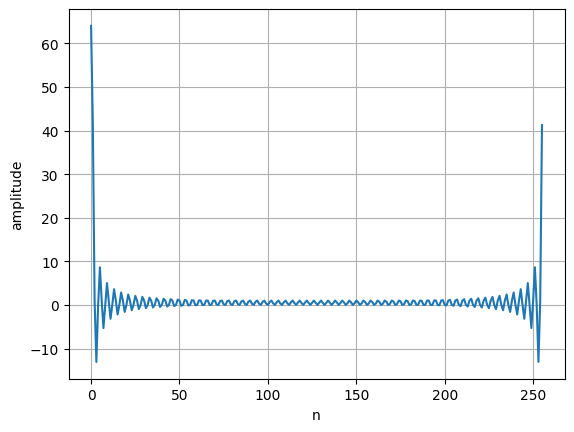

Grafico de y_transformado


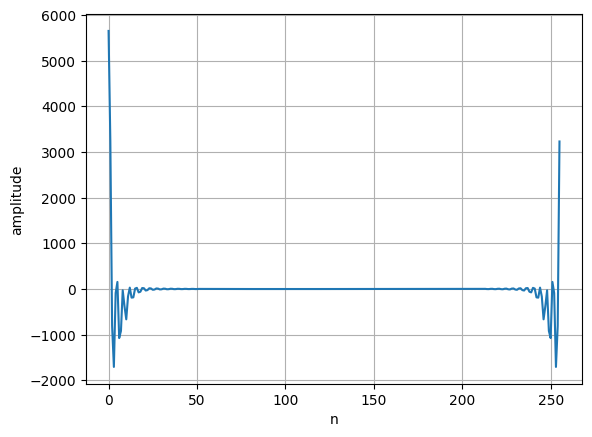

In [14]:
x_transformado = fft(xn)
y_transformado = fft(xn_filtrado)

print("Grafico de x_transformado")
plt.plot(x_transformado)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

print("Grafico de y_transformado")
plt.plot(y_transformado)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


Grafico do sinal]


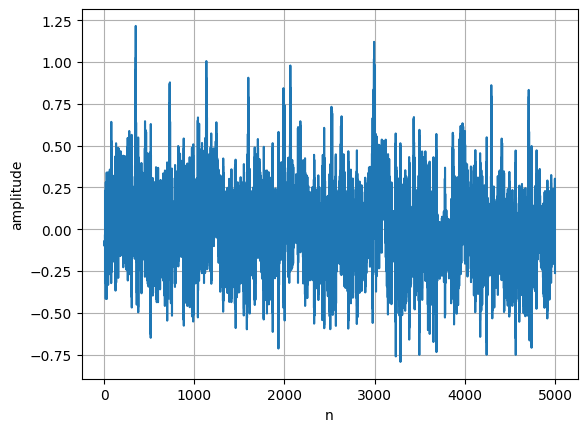

Grafico do sinal filtrado


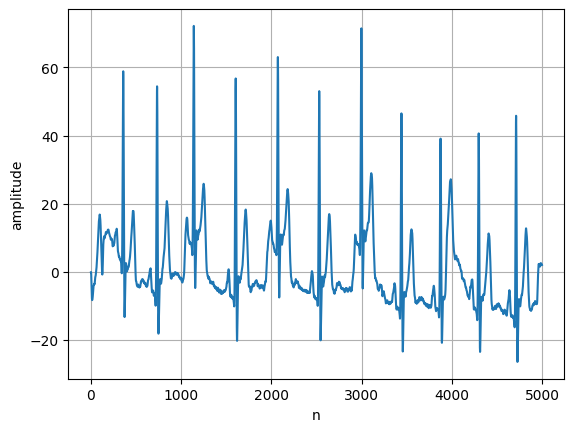

In [15]:
sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

print("Grafico do sinal]")
plt.plot(sinal)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

print("Grafico do sinal filtrado")
plt.plot(filtro(sinal))
plt.xlabel("n")
plt.ylabel("amplitude")
plt.grid()
plt.show()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [16]:
sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()

def qual_digito(f):
    freq = f[0]
    for i in freq:
        if i < 1146:
            pass
        elif 1146 < i <= 1272:
            for j in freq:
                if j < 624:
                    pass
                elif 624 <= j < 733:
                    return 1
                elif 733 <= j < 811:
                    return 4
                elif 811 <= j < 896:
                    return 7
                elif 896 <= j:
                    pass
        elif 1272 <= i < 1406:
            for j in freq:
                if j < 624:
                    pass
                elif 624 <= j < 733:
                    return 2
                elif 733 <= j < 811:
                    return 5
                elif 811 <= j < 896:
                    return 8
                elif 896 <= j < 984:
                    return 0
                elif 984 <= j:
                    pass
        elif 1406 <= i < 1548:
            for j in freq:
                if j < 624:
                    pass
                elif 624 <= j < 733:
                    return 3
                elif 733 <= j < 811:
                    return 6
                elif 811 <= j < 896:
                    return 9
                elif 896 <= j:
                    pass
        elif  1548 <= i:
            pass

def decodificar(sinal):

    frequencia_amostragem = 8192
    transformada = fft(sinal)

    # print("Sinal")
    # plt.plot(sinal)
    # plt.xlabel("n")
    # plt.ylabel("amplitude")
    # plt.grid()
    # plt.show()

    # print("Transformada do sinal")
    # plt.plot(transformada)
    # plt.xlabel("Hz")
    # plt.ylabel("amplitude")
    # plt.grid()
    # plt.show()

    posicao_digito = 0
    telefone = ""
    for i in range(0, len(sinal), frequencia_amostragem):
        posicao_digito += 1
        digito = fft(sinal[i:i + frequencia_amostragem])
        frequencias = find_peaks(digito)
        d = qual_digito(frequencias)
        # print(frequencias)
        # print(d)
        # print(f"Digito {posicao_digito}")
        # plt.plot(digito)
        # plt.xlabel("Hz")
        # plt.ylabel("amplitude")
        # plt.grid()
        # plt.show()
        telefone += str(d)
    print(f"O numero de telefone é {telefone}")


decodificar(sinal1)
decodificar(sinal2)
decodificar(sinal3)

O numero de telefone é 31075580
O numero de telefone é 911
O numero de telefone é 2446712


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
